In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:





df=pd.read_excel('flight_price.xlsx')

In [3]:
df=pd.read_excel('flight_price.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df=df[~df['Route'].isnull()]

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.drop('Route',axis=1,inplace=True)

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 899.1+ KB


In [17]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]

In [18]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1]

In [19]:
df['Year']=df['Date_of_Journey'].str.split('/').str[2]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  object
 11  Month            10462 non-null  object
 12  Year             10462 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [21]:
df['Dep_Time'].value_counts()

Dep_Time
18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
04:50      1
12:45      1
12:05      1
21:40      1
03:00      1
Name: count, Length: 222, dtype: int64

In [22]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [23]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]

In [24]:
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]

In [25]:
df['Dep_min'].unique()

array(['20', '50', '25', '05', '00', '55', '45', '40', '10', '15', '35',
       '30'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  object
 11  Month            10462 non-null  object
 12  Year             10462 non-null  object
 13  Dep_hour         10462 non-null  object
 14  Dep_min          10462 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.3+ MB


In [27]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], shape=(1343,), dtype=object)

In [28]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [29]:
df['Arrival_Time'].unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [30]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]

In [31]:
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  object
 11  Month            10462 non-null  object
 12  Year             10462 non-null  object
 13  Dep_hour         10462 non-null  object
 14  Dep_min          10462 non-null  object
 15  Arrival_hour     10462 non-null  object
 16  Arrival_min      10462 non-null  object
dtypes: int64(1), object(16)
memory usage

In [33]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [34]:
df['Duration_hour']=df['Duration'].str.extract(r'(\dt)h').fillna(0).astype(int)

In [35]:
df['Duration_min']=df['Duration'].str.extract(r'(\dt)m').fillna(0).astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  object
 11  Month            10462 non-null  object
 12  Year             10462 non-null  object
 13  Dep_hour         10462 non-null  object
 14  Dep_min          10462 non-null  object
 15  Arrival_hour     10462 non-null  object
 16  Arrival_min      10462 non-null  object
 17  Duration_hour    10462 non-null  int

In [37]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [38]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [39]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  int64 
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  object
 11  Month            10462 non-null  object
 12  Year             10462 non-null  object
 13  Dep_hour         10462 non-null  object
 14  Dep_min          10462 non-null  object
 15  Arrival_hour     10462 non-null  object
 16  Arrival_min      10462 non-null  object
 17  Duration_hour    10462 non-null  int

In [41]:
df.drop(columns=['Date_of_Journey','Arrival_Time','Duration','Dep_Time'],axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Total_Stops      10462 non-null  int64 
 4   Additional_Info  10462 non-null  object
 5   Price            10462 non-null  int64 
 6   Day              10462 non-null  object
 7   Month            10462 non-null  object
 8   Year             10462 non-null  object
 9   Dep_hour         10462 non-null  object
 10  Dep_min          10462 non-null  object
 11  Arrival_hour     10462 non-null  object
 12  Arrival_min      10462 non-null  object
 13  Duration_hour    10462 non-null  int64 
 14  Duration_min     10462 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [43]:
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_min']=df['Duration_min'].astype(int)

In [44]:
num_data=df.select_dtypes(exclude='object').columns
print(num_data)
print(len(num_data))

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min'],
      dtype='object')
11


In [45]:
cat_data=df.select_dtypes(include='object').columns
print(cat_data)
print(len(cat_data))

Index(['Airline', 'Source', 'Destination', 'Additional_Info'], dtype='object')
4


In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,0,0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,0,0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,0,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,0,0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,0,0


<Axes: ylabel='Airline'>

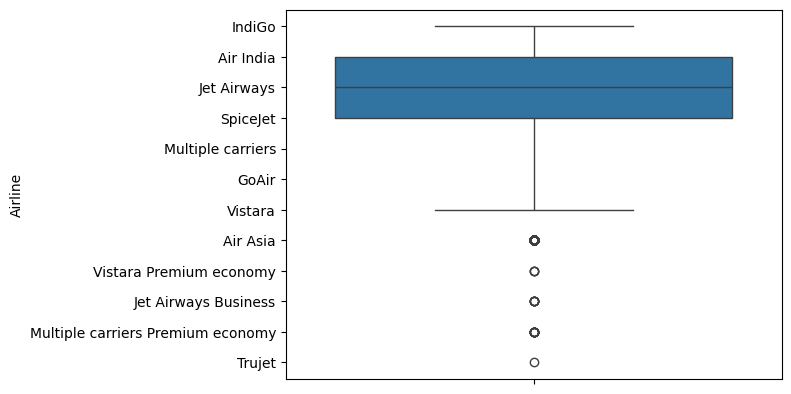

In [47]:
sns.boxplot(df['Airline'])

<Axes: ylabel='Source'>

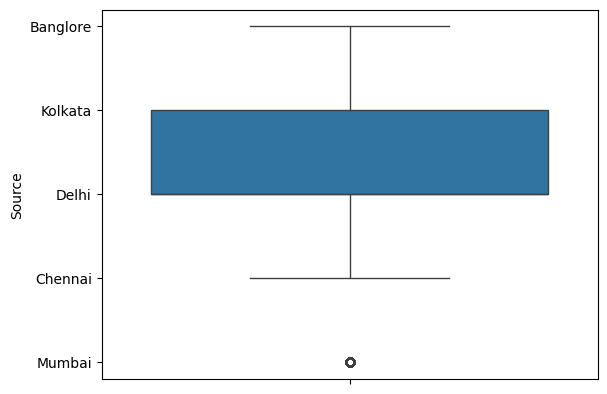

In [48]:
sns.boxplot(df['Source'])

<Axes: xlabel='Price', ylabel='Count'>

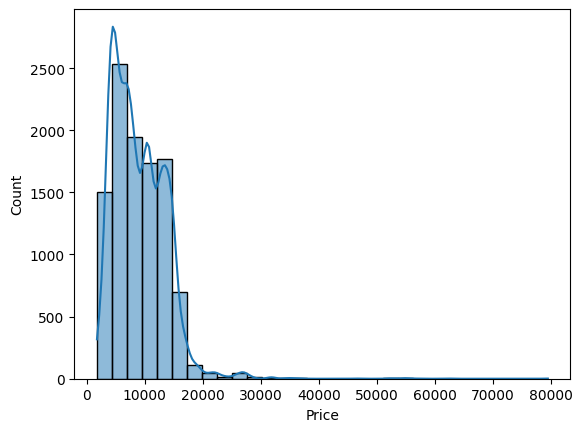

In [49]:
sns.histplot(df['Price'],bins=30,kde=True)

<Axes: xlabel='Price', ylabel='Count'>

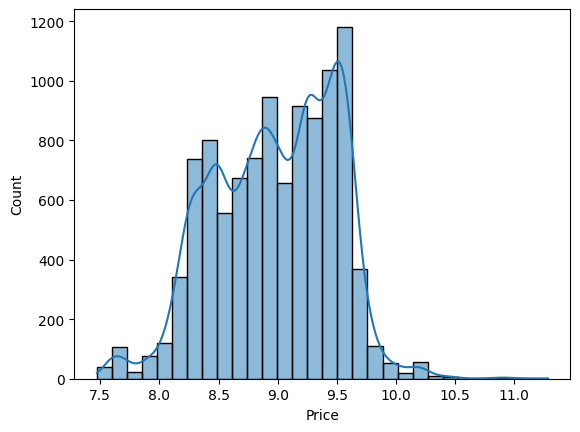

In [50]:
sns.histplot(np.log(df['Price']),bins=30,kde=True)

In [51]:
df['Additional_Info']=df['Additional_Info'].replace('No info','No Info')

<Axes: ylabel='count'>

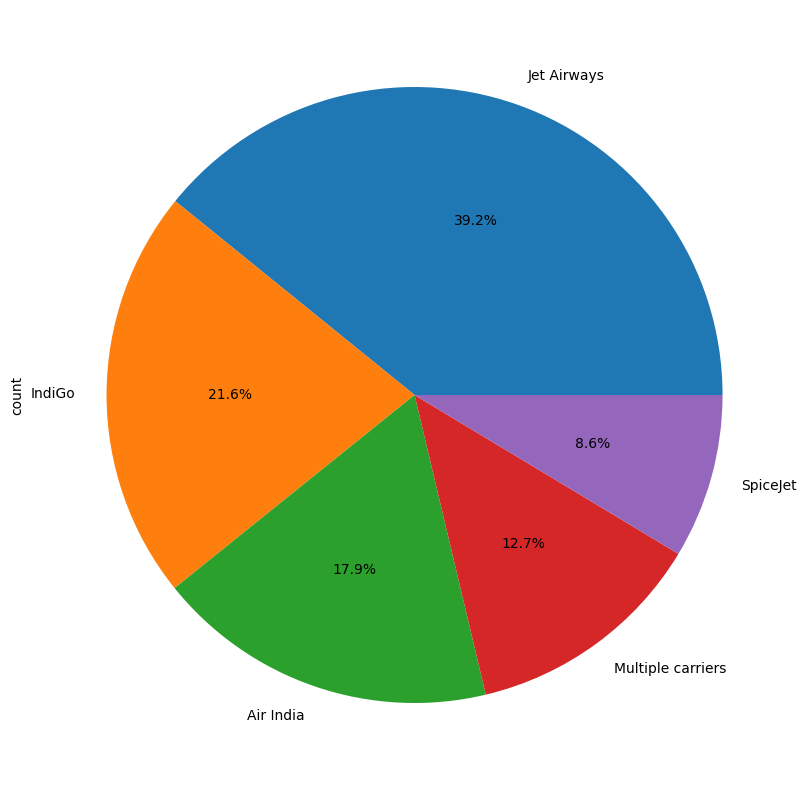

In [52]:
df['Airline'].value_counts().head(5).plot.pie(autopct='%1.1f%%',figsize=(15,10))

<Axes: xlabel='Price'>

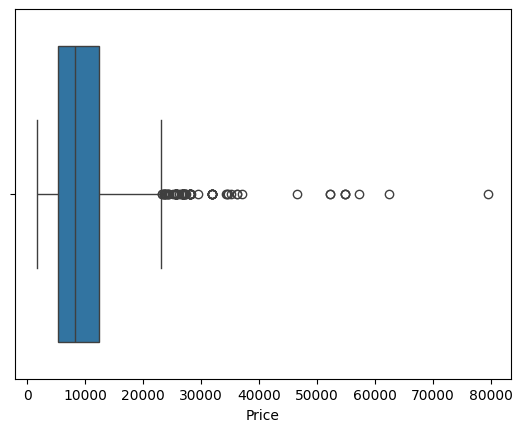

In [53]:
sns.boxplot(x=df['Price'])

In [54]:
df_check=df[df['Price']>25000]

<Axes: xlabel='Price', ylabel='Count'>

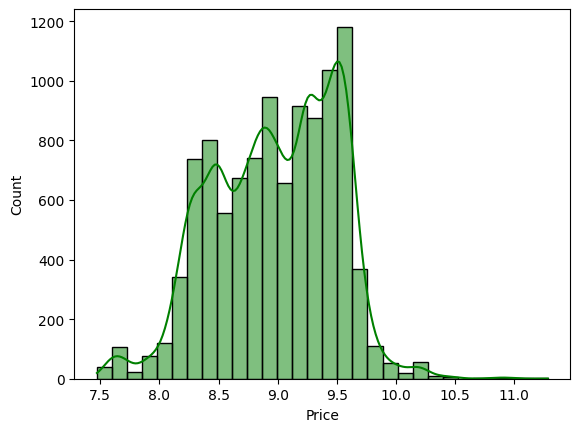

In [55]:


sns.histplot(np.log(df['Price']),bins=30,kde=True,color='g')


In [56]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.0
mean,0.802332,9026.790289,13.463200,4.701491,2019.0,12.478494,24.404989,13.387689,24.719939,0.0,0.0
std,0.660609,4624.849541,8.467493,1.163802,0.0,5.727227,18.815719,6.855547,16.570450,0.0,0.0
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,0.0,0.0
50%,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,0.0,0.0
75%,1.000000,12344.750000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,0.0,0.0
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,0.0,0.0


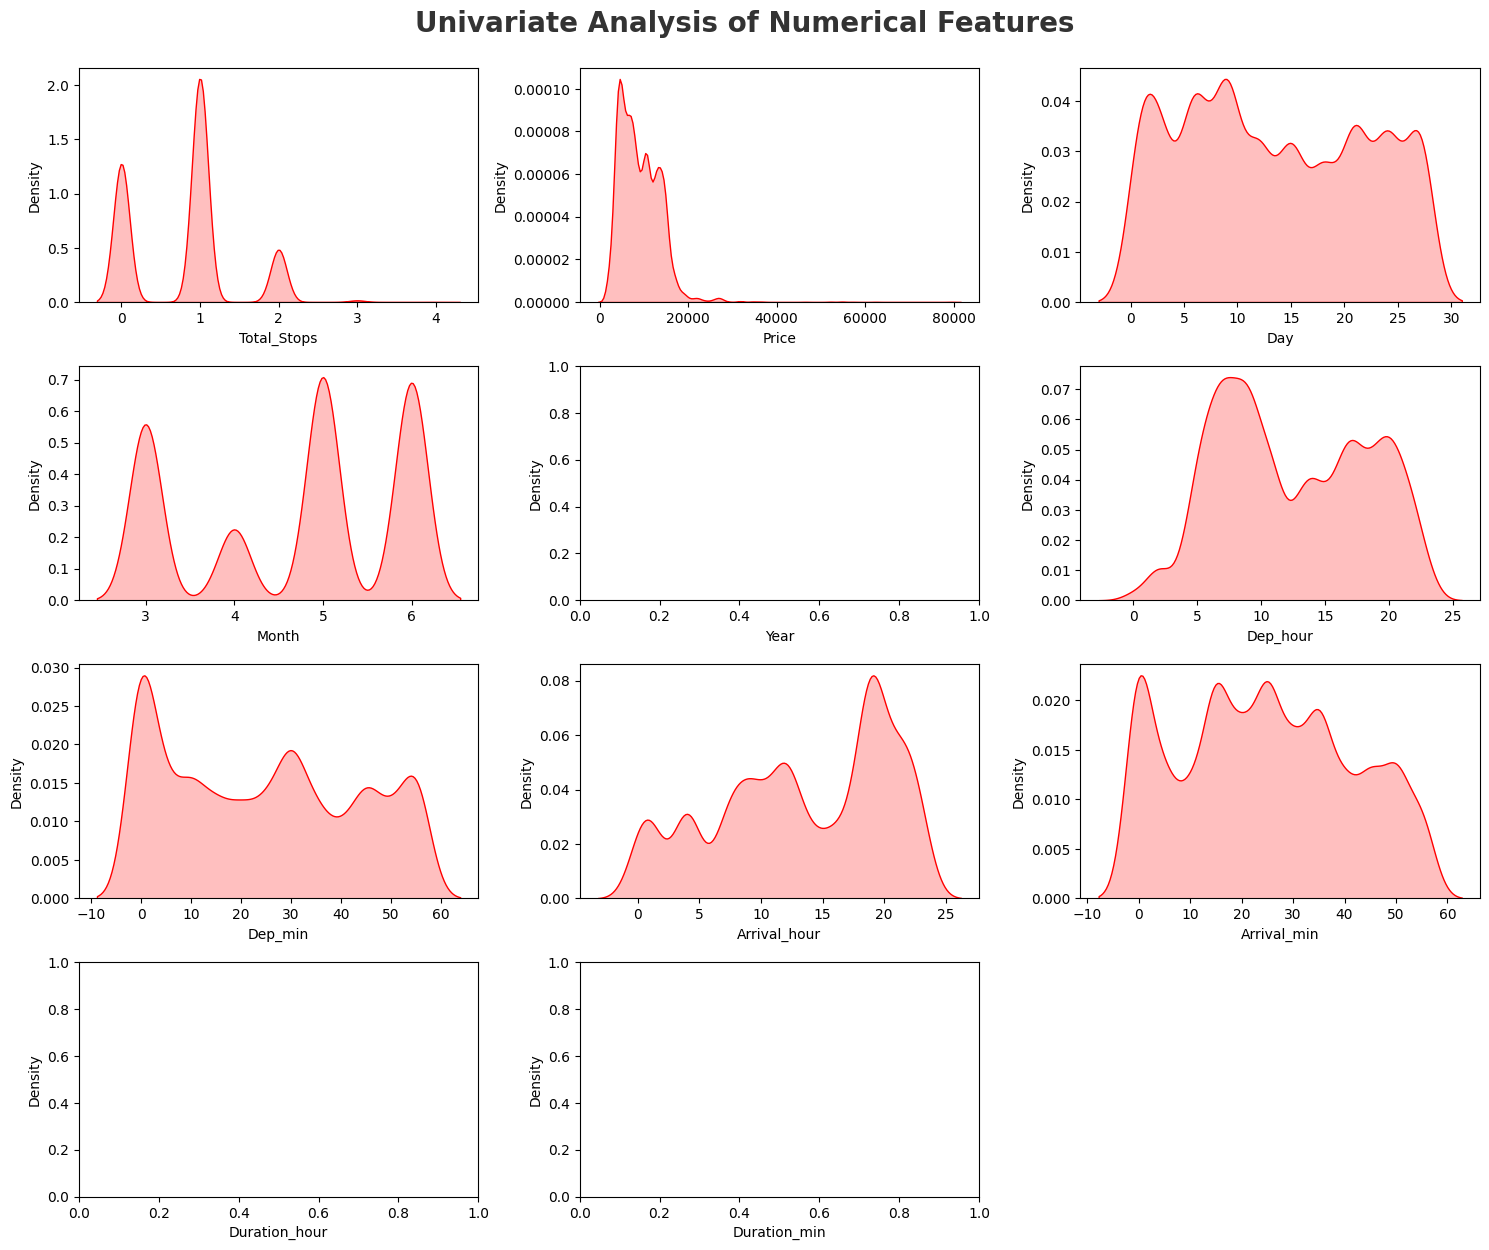

In [57]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_data)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_data[i]],shade=True, color='r')
    plt.xlabel(num_data[i])
    plt.tight_layout()

In [58]:
target_value=df.groupby(['Airline','Source','Destination'])['Price'].agg(['mean','median','sum'])

In [59]:
target_value

mean   median  \
Airline                           Source   Destination                          
Air Asia                          Banglore Delhi         4265.577465   4282.0   
                                           New Delhi     5791.944444   5048.5   
                                  Delhi    Cochin        7804.175000   6752.0   
                                  Kolkata  Banglore      5012.320000   4409.0   
Air India                         Banglore Delhi         6045.166667   6121.0   
                                           New Delhi    11024.679426  11003.0   
                                  Chennai  Kolkata       5895.640000   4667.0   
                                  Delhi    Cochin        9960.348506   9653.0   
                                  Kolkata  Banglore     10296.273453  10676.0   
                                  Mumbai   Hyderabad     6260.051471   3100.0   
GoAir                             Banglore Delhi         4050.289855   3898.0   
                                           New Delhi     7532.333333   7222.0   
                                  Delhi    Cochin        6587.157895   5842.0   
                                  Kolkata  Banglore      7047.000000   7102.0   
IndiGo                            Banglore Delhi         4399.581967   4423.0   
                                           New Delhi     7351.884354   6860.0   
                                  Chennai  Kolkata       4538.766304   3854.0   
                                  Delhi    Cochin        7203.933333   6494.0   
                                  Kolkata  Banglore      5075.235955   4804.0   
                                  Mumbai   Hyderabad     3659.816327   3175.0   
Jet Airways                       Banglore Delhi         6412.954054   7229.0   
                                           New Delhi    15120.151079  13555.0   
                                  Delhi    Cochin       12626.772601  12898.0   
                                  Kolkata  Banglore     11717.565287  11467.0   
                                  Mumbai   Hyderabad     6227.949772   5678.0   
Jet Airways Business              Banglore New Delhi    62844.250000  59818.0   
                                  Delhi    Cochin       49387.500000  49387.5   
Multiple carriers                 Delhi    Cochin       10902.678094  10197.0   
Multiple carriers Premium economy Delhi    Cochin       11418.846154  11269.0   
SpiceJet                          Banglore Delhi         4012.839416   3971.0   
                                           New Delhi     6313.121951   5575.0   
                                  Chennai  Kolkata       3993.523438   3597.0   
                                  Delhi    Cochin        5916.356322   5583.0   
                                  Kolkata  Banglore      4642.883333   3873.0   
                                  Mumbai   Hyderabad     2511.106557   2017.0   
Trujet                            Mumbai   Hyderabad     4140.000000   4140.0   
Vistara                           Banglore Delhi         5042.312977   4878.0   
                                           New Delhi     9014.264151   7608.0   
                                  Chennai  Kolkata       7491.372093   5944.0   
                                  Delhi    Cochin        6465.644444   6216.0   
                                  Kolkata  Banglore      9257.683060   8820.0   
                                  Mumbai   Hyderabad    12326.521739  12395.0   
Vistara Premium economy           Banglore Delhi         5969.000000   5969.0   
                                           New Delhi    11793.000000  11793.0   
                                  Chennai  Kolkata       9125.000000   9125.0   

                                                             sum  
Airline                           Source   Destination            
Air Asia                          Banglore Delhi          302856  
                                           New Delhi   

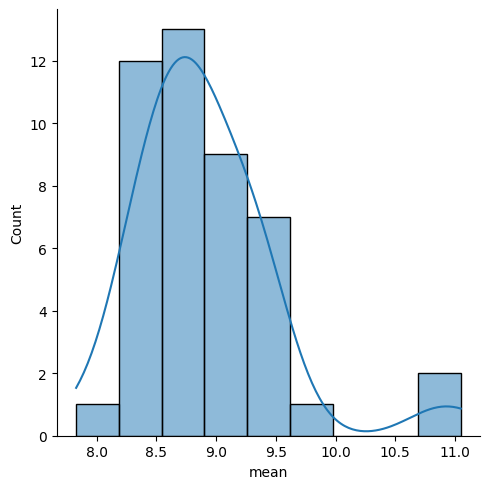

In [60]:
sns.displot(np.log(target_value['mean']),kde=True)

In [61]:
df_corr=df[num_data]

In [62]:
df_corr

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,0,3897,24,3,2019,22,20,1,10,0,0
1,2,7662,1,5,2019,5,50,13,15,0,0
2,2,13882,9,6,2019,9,25,4,25,0,0
3,1,6218,12,5,2019,18,5,23,30,0,0
4,1,13302,1,3,2019,16,50,21,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,0,0
10679,0,4145,27,4,2019,20,45,23,20,0,0
10680,0,7229,27,4,2019,8,20,11,20,0,0
10681,0,12648,1,3,2019,11,30,14,10,0,0


In [63]:
df_corr

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,0,3897,24,3,2019,22,20,1,10,0,0
1,2,7662,1,5,2019,5,50,13,15,0,0
2,2,13882,9,6,2019,9,25,4,25,0,0
3,1,6218,12,5,2019,18,5,23,30,0,0
4,1,13302,1,3,2019,16,50,21,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,0,0
10679,0,4145,27,4,2019,20,45,23,20,0,0
10680,0,7229,27,4,2019,8,20,11,20,0,0
10681,0,12648,1,3,2019,11,30,14,10,0,0


In [64]:
df_corr.corr()

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
Total_Stops,1.000000,0.602013,-0.018937,0.039003,NaN,-0.067523,-0.002695,0.051476,-0.107099,NaN,NaN
Price,0.602013,1.000000,-0.159044,-0.113396,NaN,0.005155,-0.024155,0.031023,-0.086163,NaN,NaN
Day,-0.018937,-0.159044,1.000000,-0.038331,NaN,-0.003394,-0.004741,-0.002448,-0.015086,NaN,NaN
Month,0.039003,-0.113396,-0.038331,1.000000,NaN,0.040406,-0.062636,0.001423,-0.099261,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hour,-0.067523,0.005155,-0.003394,0.040406,NaN,1.000000,-0.015068,-0.003827,0.072989,NaN,NaN
Dep_min,-0.002695,-0.024155,-0.004741,-0.062636,NaN,-0.015068,1.000000,0.046564,-0.021353,NaN,NaN
Arrival_hour,0.051476,0.031023,-0.002448,0.001423,NaN,-0.003827,0.046564,1.000000,-0.152036,NaN,NaN
Arrival_min,-0.107099,-0.086163,-0.015086,-0.099261,NaN,0.072989,-0.021353,-0.152036,1.000000,NaN,NaN
Duration_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

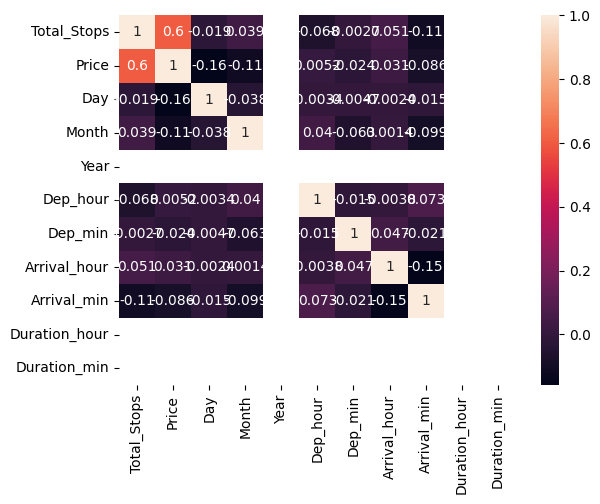

In [65]:
sns.heatmap(df_corr.corr(), annot=True,)

In [66]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [67]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [68]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
426,Vistara Premium economy,Banglore,New Delhi,0,No Info,11793,3,3,2019,16,0,18,35,0,0
7657,Vistara Premium economy,Chennai,Kolkata,0,No Info,9125,1,3,2019,7,5,9,20,0,0
8615,Vistara Premium economy,Banglore,Delhi,0,No Info,5969,6,4,2019,11,30,14,20,0,0


In [69]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [70]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [72]:
df[df['Additional_Info']=='No Info'].shape

(8185, 15)

In [73]:
df.drop(columns=['Additional_Info'],axis=1,inplace=True)

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[['Source', 'Destination', 'Airline']])
encoder_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Source', 'Destination', 'Airline']),
    index=df.index
)

In [76]:
df = pd.concat([
    df.drop(['Airline', 'Source', 'Destination'], axis=1),
    encoder_df
], axis=1)

In [77]:
import pickle
with open('onehot_encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [78]:
df.head()

,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,2019,22,20,1,10,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7662,1,5,2019,5,50,13,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,9,6,2019,9,25,4,25,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6218,12,5,2019,18,5,23,30,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,13302,1,3,2019,16,50,21,35,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X=df.drop('Price',axis=1)

In [80]:
y=df['Price']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [82]:
num_features = ['Total_Stops','Day','Month','Year','Dep_hour','Dep_min',
                'Arrival_hour','Arrival_min','Duration_hour','Duration_min']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])


In [83]:
with open('scaler.pkl','wb')as file:
    pickle.dump(scaler,file)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

In [85]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K_Neigh":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor()
}

In [86]:
def evaluation_score(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    r2_scoree=r2_score(true,pred)
    return mae,mse,rmse,r2_scoree

In [87]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    mae_train,mse_train,rmse_train,r2_scoree_train=evaluation_score(y_train,y_pred_train)
    mae_test,mse_test,rmse_test,r2_scoree_test=evaluation_score(y_test,y_pred_test)
    print(list(models.keys())[i])
    print(mae_train,mse_train,rmse_train,r2_scoree_train)
    print('for test data')
    print(mae_test,mse_test,rmse_test,r2_scoree_test)

LinearRegression
1957.8649179727358 8085568.430426178 2843.5133955067236 0.6202237448059831
for test data
1951.4111130410386 8010948.082399606 2830.3618288832977 0.6304481811585924
Lasso
1957.6658090759204 8090764.826060814 2844.4269767495903 0.6199796719629158
for test data
1951.6143539880618 8019687.401922551 2831.905260054183 0.6300450289484019
Ridge
1959.8396675607726 8118350.496148089 2849.271923868989 0.6186839829123675
for test data
1955.2967089278534 8055079.352588579 2838.1471689446585 0.6284123682937022
K_Neigh
1148.7349222533774 3600408.119087433 1897.474141875834 0.8308901193029556
for test data
1402.1244648318043 5016620.247889909 2239.781294655777 0.7685790598097311
DecisionTree
294.9556037046478 595957.3243691053 771.9827228436562 0.9720080977791669
for test data
1357.2979102956167 5889311.370922527 2426.790343421229 0.7283210792952883
Random Forest Regressor
560.2117315045782 951361.6145828855 975.3776779191154 0.955314885473973
for test data
1156.8731035811368 3709611.

In [88]:
##randomforest and xgb boost
##hyperparametric tunning
rfr_params = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],
    "max_depth": [5, 8, 12, 20, None],
    "min_samples_split": [2,3,4,5,6],
    "max_features": ["auto", "sqrt", 5, 10]
}


xg_params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 5, 6, 8, 10],
    "n_estimators": [200, 300, 500],
    "colsample_bytree": [0.5, 0.8, 1.0]
}
    

In [89]:
randomsearch_cv=[
    ("rfr",RandomForestRegressor(),rfr_params),
    ("XGBRegressor",XGBRegressor(),xg_params)
]
from sklearn.model_selection import RandomizedSearchCV
model_param={}

In [90]:
for name,model,params in randomsearch_cv:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=10,cv=5,verbose=0
                             
                             )
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(model_param[model_name])
    

{'min_samples_split': 2, 'max_features': 10, 'max_depth': 20, 'criterion': 'absolute_error'}
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [98]:
models={
    "Random":RandomForestRegressor(
    criterion='absolute_error',  
    max_depth=20,              
    min_samples_split=2,        
    n_jobs=-1  ,      
    max_features=10,     
    ) ,    

   "XGBR":XGBRegressor(
    learning_rate=0.05,
    max_depth=8,
    n_estimators=300,
    colsample_bytree=0.5)}
def evaluation_score(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    r2_scoree=r2_score(true,pred)
    return mae,mse,rmse,r2_scoree
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    mae_train,mse_train,rmse_train,r2_scoree_train=evaluation_score(y_train,y_pred_train)
    mae_test,mse_test,rmse_test,r2_scoree_test=evaluation_score(y_test,y_pred_test)
    print(list(models.keys())[i])
    print(mae_train,mse_train,rmse_train,r2_scoree_train)
    print('for test data')
    print(mae_test,mse_test,rmse_test,r2_scoree_test)

Random
728.4692422890646 1417084.223467356 1190.4134674420295 0.9334400612259011
for test data
1173.0350133792049 3594153.582513026 1895.8253037959553 0.8341986516513296
XGBR
837.3390502929688 1483579.5 1218.02278303815 0.9303168058395386
for test data
1097.41748046875 2889474.0 1699.8452870776212 0.866706132888794


Text(0, 0.5, 'Predicted data')

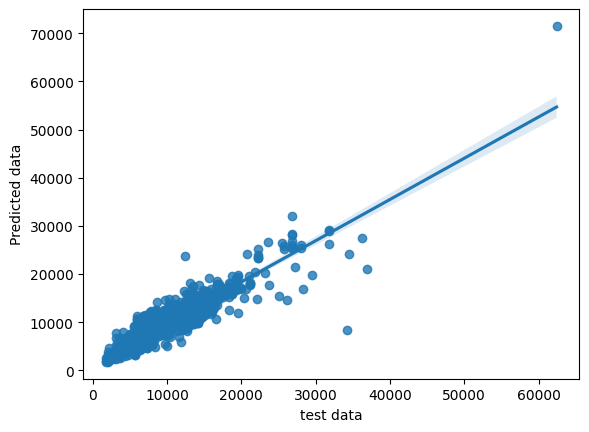

In [99]:
sns.regplot(x=y_test,y=y_pred_test)
plt.xlabel("test data")
plt.ylabel('Predicted data')

In [100]:
diff=y_test -y_pred_test

In [101]:
residuals=diff

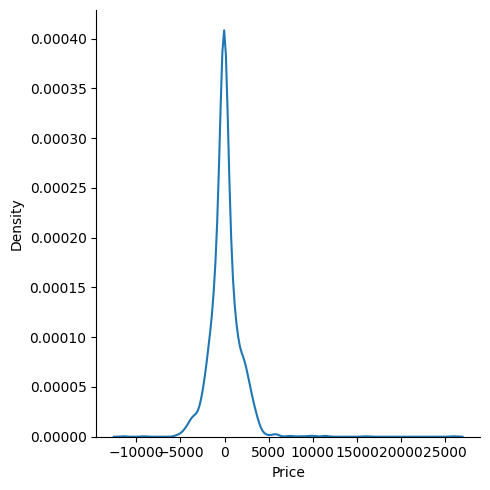

In [102]:

sns.displot(residuals,kind="kde")

<Axes: ylabel='Price'>

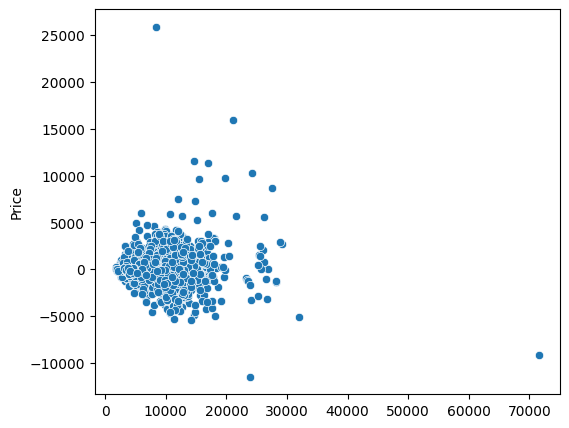

In [103]:

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred_test,y=residuals)

In [104]:
import pickle

# Random Forest
with open('random_forest_model.pkl','wb') as f:
    pickle.dump(models['Random'], f)

# XGBoost
with open('xgb_model.pkl','wb') as f:
    pickle.dump(models['XGBR'], f)
